# Noise analysis for ESP32 using BC547B NPN transistor as an amplifier

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

The following three data files contain 300,000 readings each (250 readings per second over 20 minutes)

The column "value" represents input 1 and "value2" represents input 2 throughout all datasets

In [250]:
# During base source data the inputs were connected to the signal source through two separate lowpass filters.
# One filter for each input. The output signal maintains the same level throughout the experiment.
# The purpose of this file is to determine how the filters affect the readings
# This should be compensated for when analysing transistor data
base_source_data = pd.read_csv("../output/base_2.csv", sep=", ")
print(base_source_data.shape)
base_source_data.head()

C:\Users\noskn\AppData\Local\Temp\ipykernel_7836\2047634959.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  base_source_data = pd.read_csv("../output/base_2.csv", sep=", ")


(300006, 3)


,time,value,value2
0,10780120,2289,2559
1,10780124,2286,2550
2,10780128,2287,2551
3,10780132,2288,2554
4,10780136,2287,2553


In [251]:
# In transistor data, the column "value" was measured at the base of the transistor
# meaning it measures the transistor base voltage
# "value2" was measured at the collector of the transistor
# meaning it measures the transistor collector voltage
transistor_data = pd.read_csv("../output/transistor_5.csv", sep=", ")
print(transistor_data.shape)
transistor_data.head()

C:\Users\noskn\AppData\Local\Temp\ipykernel_7836\3690541358.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  transistor_data = pd.read_csv("../output/transistor_5.csv", sep=", ")


(300004, 3)


,time,value,value2
0,6952172,754,3334
1,6952176,756,3341
2,6952180,761,3343
3,6952184,752,3331
4,6952188,756,3339


In [252]:
# In transistor reverse data, everything is the same
# except the physical input connections are swapped
# so that "value" is measured at the collector
# and "value2" is measured at the base
# The purpose of this is to compare the two measurements
# to see if the inputs, and by extension the filters, behave differently at different voltage levels
# and thus determine if this must be accounted for
transistor_reverse_data = pd.read_csv("../output/transistor_reverse_5.csv", sep=", ")
print(transistor_reverse_data.shape)
transistor_reverse_data.head()

C:\Users\noskn\AppData\Local\Temp\ipykernel_7836\3458765456.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  transistor_reverse_data = pd.read_csv("../output/transistor_reverse_5.csv", sep=", ")


(300006, 3)


,time,value,value2
0,8283500,3197,937
1,8283504,3199,939
2,8283508,3188,929
3,8283512,3191,931
4,8283516,3195,931


## Clean the source data

### Time axis

<AxesSubplot: ylabel='time'>

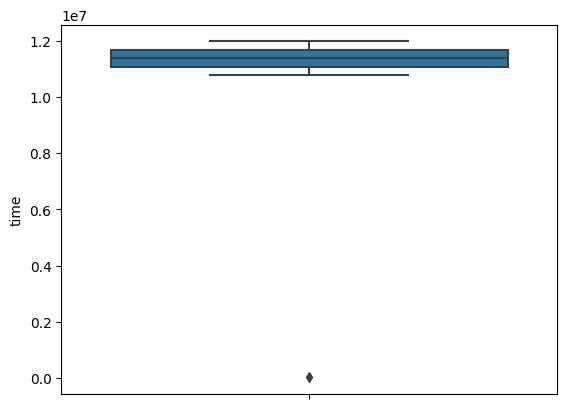

In [253]:
sns.boxplot(y="time", data=base_source_data)

Time should not have any outliers. We remove the outlier.

<AxesSubplot: ylabel='time'>

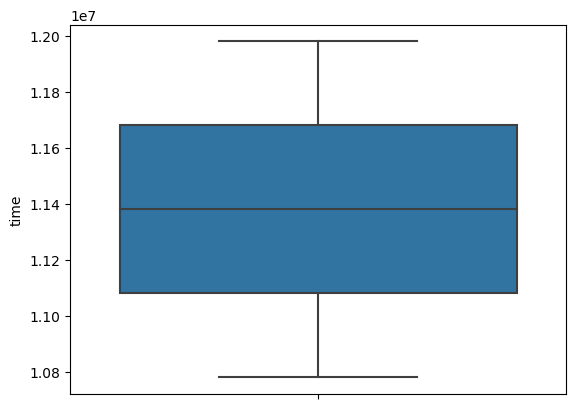

In [254]:
base_source_data.drop(np.argmin(base_source_data["time"]), inplace=True)
sns.boxplot(y="time", data=base_source_data)

### Value 1

<AxesSubplot: ylabel='value'>

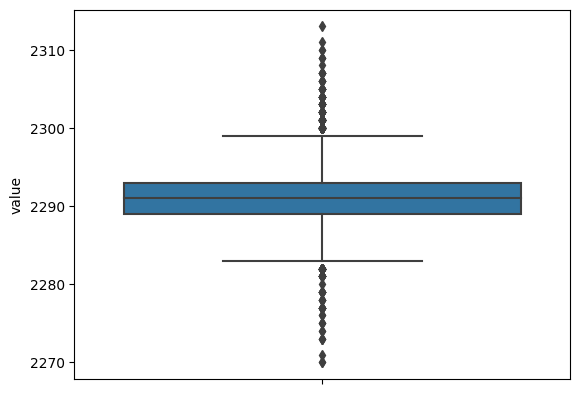

In [255]:
sns.boxplot(y="value", data=base_source_data)

There are some outliers, however none such as they would constitute a transmission error. They are likely caused by power fluctuations in the power supply (my computer) or other external factors. We plot the data to determine if this is worth acocunting for.

<AxesSubplot: xlabel='time', ylabel='value'>

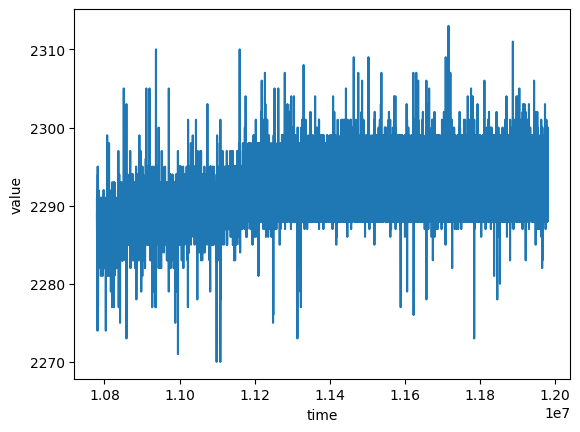

In [256]:
sns.lineplot(x="time", y="value", data=base_source_data)

While these spikes are geniune datapoints, addressing these spikes is not currently a priority. We will remove them from the dataset, and prioritize the more regular input noise.

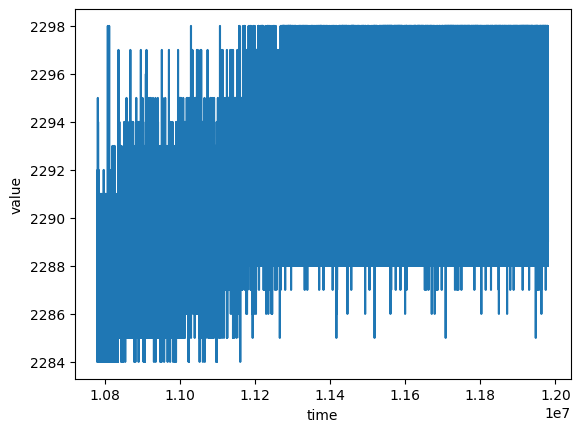

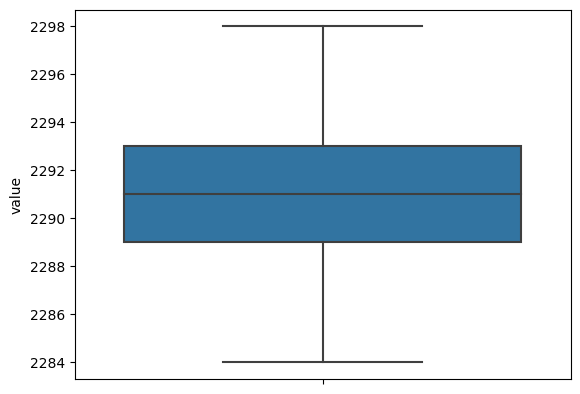

In [257]:
base_source_data = base_source_data.query("value < value.quantile(.999)")
base_source_data = base_source_data.query("value > value.quantile(.001)")
sns.lineplot(x="time", y="value", data=base_source_data)
plt.show()
sns.boxplot(y="value", data=base_source_data)
plt.show()

### Value 2

<AxesSubplot: ylabel='value2'>

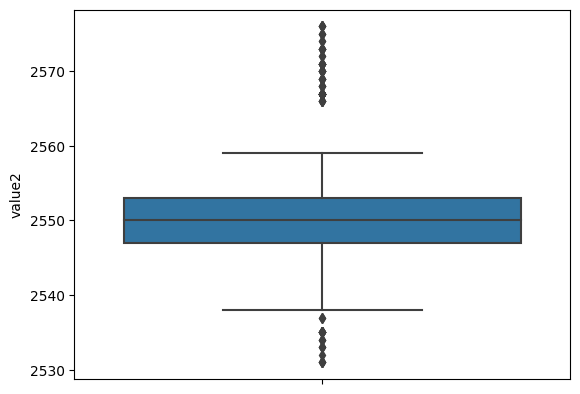

In [258]:
sns.boxplot(y="value2", data=base_source_data)

The same analysis applies to this as for the previous value.

<AxesSubplot: xlabel='time', ylabel='value2'>

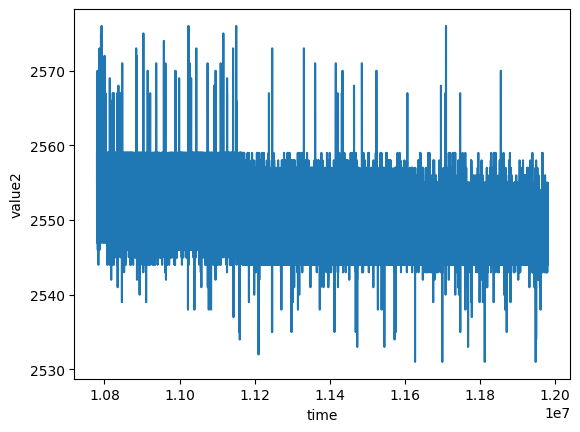

In [259]:
sns.lineplot(x="time", y="value2", data=base_source_data)

Just like for value 1 we remove the most extreme spikes from the dataset.

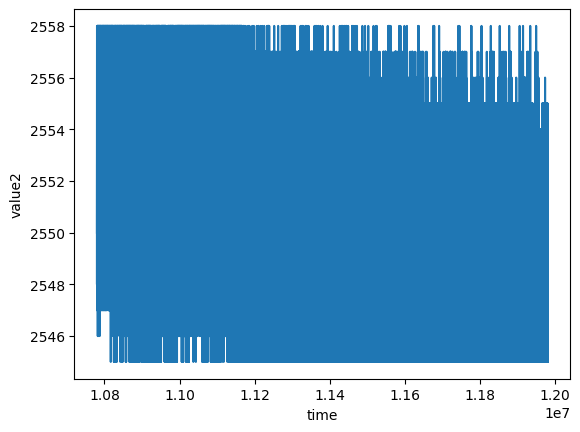

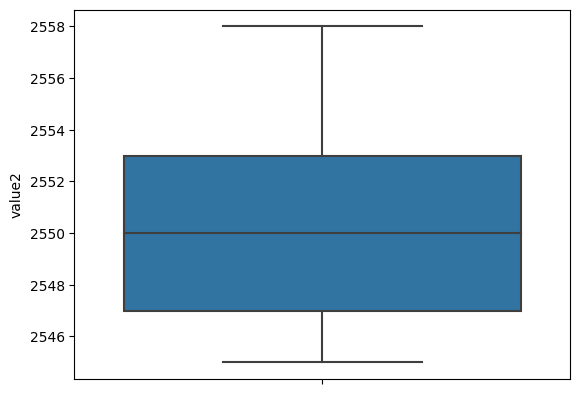

In [260]:
base_source_data = base_source_data.query("value2 < value2.quantile(.999)")
base_source_data = base_source_data.query("value2 > value2.quantile(.001)")
sns.lineplot(x="time", y="value2", data=base_source_data)
plt.show()
sns.boxplot(y="value2", data=base_source_data)
plt.show()

Now we need to make sure that this had no adverse effect on the value 1 dataset

<AxesSubplot: xlabel='time', ylabel='value'>

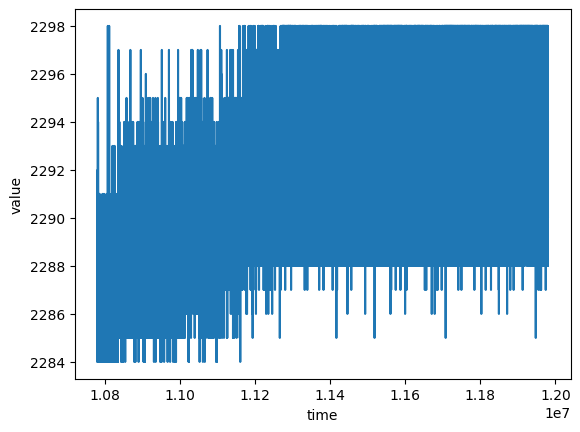

In [261]:
sns.lineplot(x="time", y="value", data=base_source_data)

The value 1 graph looks the same as before, meaning our change was ok.

## Clean the transistor data

### Time axis

<AxesSubplot: ylabel='time'>

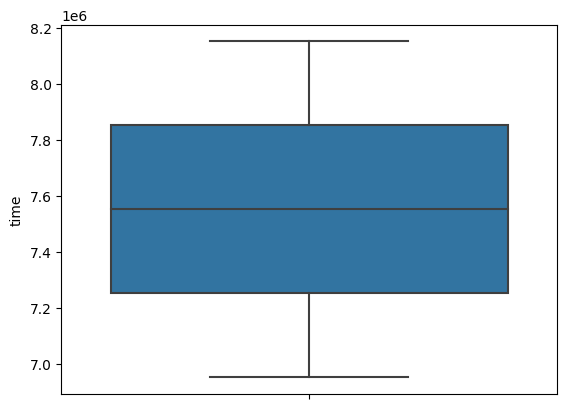

In [262]:
sns.boxplot(y="time", data=transistor_data)

The time axis has no outliers for this dataset

### Value 1

<AxesSubplot: ylabel='value'>

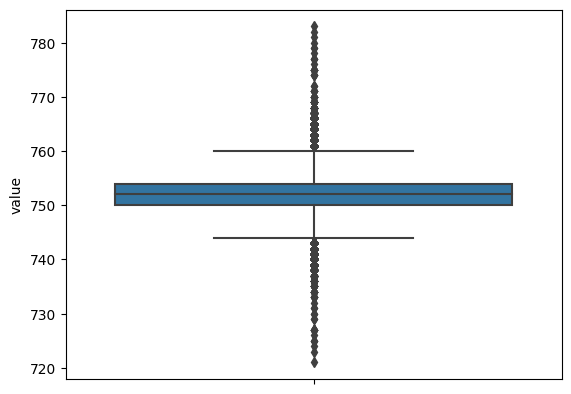

In [263]:
sns.boxplot(y="value", data=transistor_data)

There are many outliers. This is indicative of few extreme spikes. We visualize the dataset to determine the source of the outliers. 

<AxesSubplot: xlabel='time', ylabel='value'>

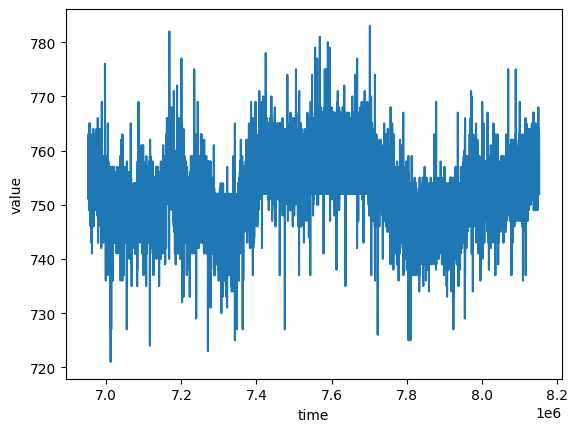

In [264]:
sns.lineplot(x="time", y="value", data=transistor_data)

We observe the same spikes as with the source dataset, and we remove the most extreme outliers.

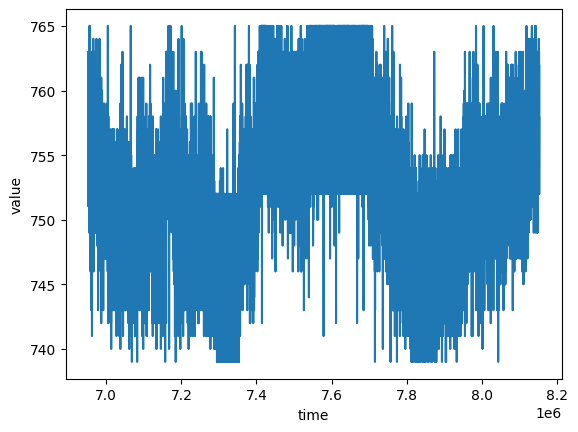

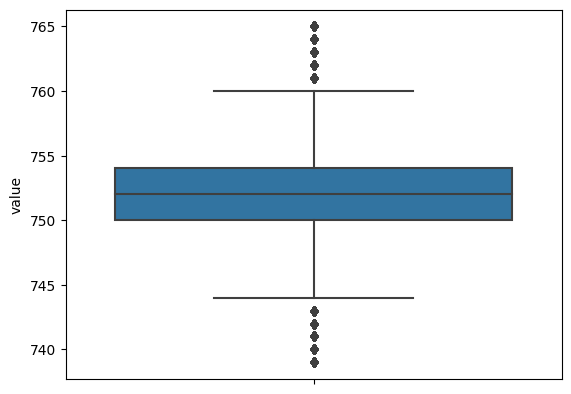

In [265]:
transistor_data = transistor_data.query("value < value.quantile(.999)")
transistor_data = transistor_data.query("value > value.quantile(.001)")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.show()
sns.boxplot(y="value", data=transistor_data)
plt.show()

We still have some outliers, however due to the shape of the data, we cannot remove them without throwing away useful data. We will leave them in the dataset.

### Value 2

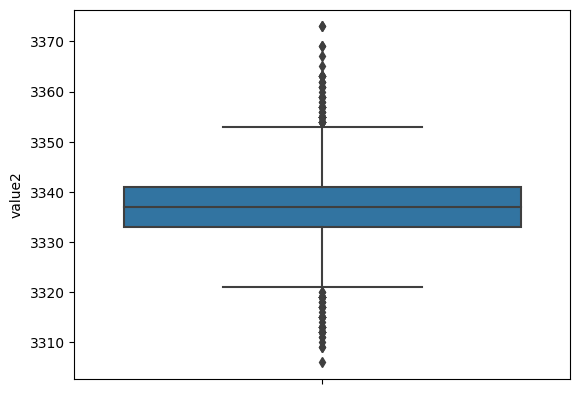

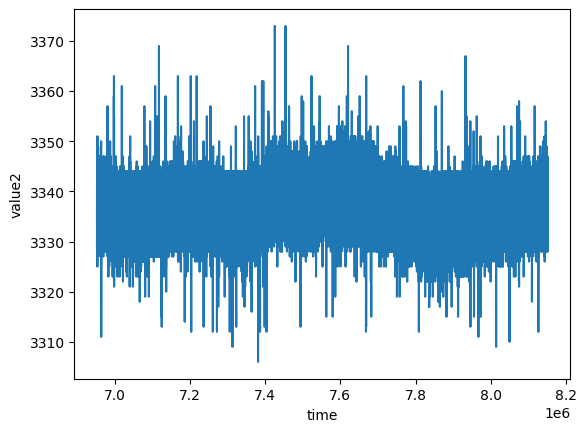

In [266]:
sns.boxplot(y="value2", data=transistor_data)
plt.show()
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.show()

We observe more spikes and remove them.

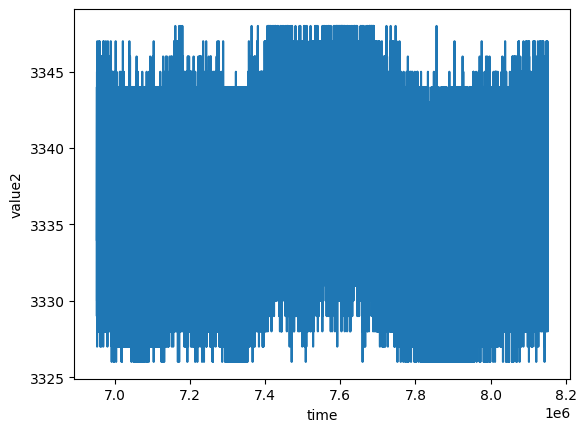

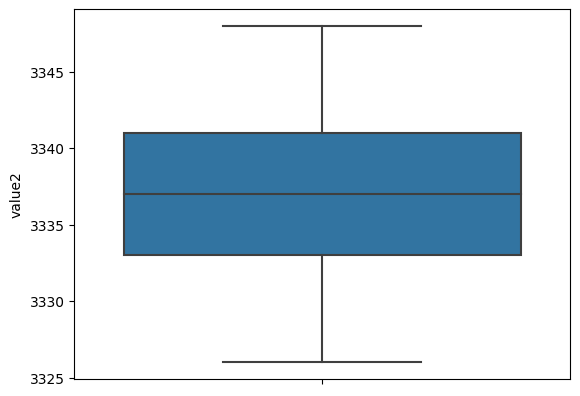

In [267]:
transistor_data = transistor_data.query("value2 < value2.quantile(.999)")
transistor_data = transistor_data.query("value2 > value2.quantile(.001)")
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.show()
sns.boxplot(y="value2", data=transistor_data)
plt.show()

We check that the value 1 dataset is not affected by this change.

<AxesSubplot: xlabel='time', ylabel='value'>

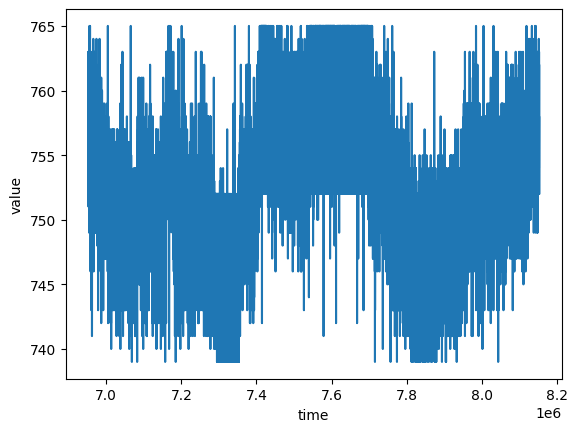

In [268]:
sns.lineplot(x="time", y="value", data=transistor_data)

The value 1 graph looks the same as before, meaning our change was ok.

## Clean the transistor reverse data

### Time axis

<AxesSubplot: ylabel='time'>

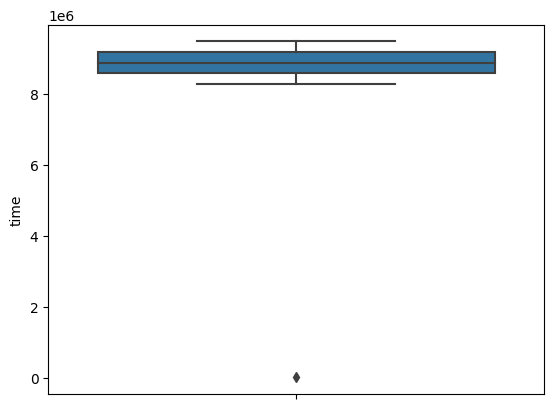

In [269]:
sns.boxplot(y="time", data=transistor_reverse_data)

<AxesSubplot: ylabel='time'>

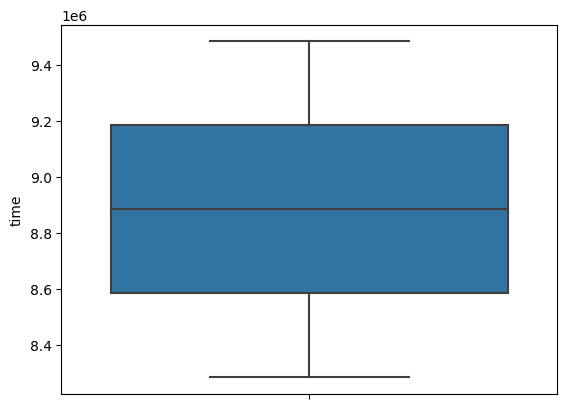

In [270]:
# Remove the outlier and plot again
transistor_reverse_data.drop(np.argmin(transistor_reverse_data["time"]), inplace=True)
sns.boxplot(y="time", data=transistor_reverse_data)

### Value 1

<AxesSubplot: ylabel='value'>

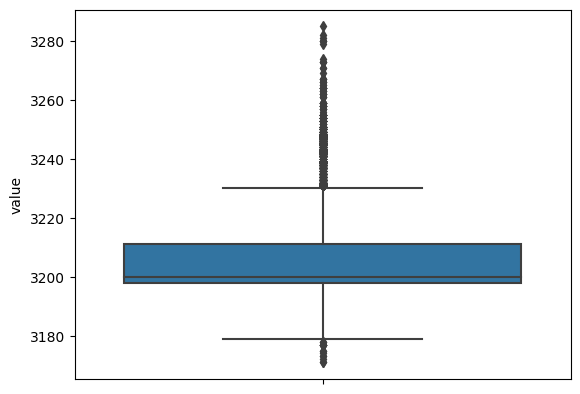

In [271]:
sns.boxplot(y="value", data=transistor_reverse_data)

We observe spikes, but mostly on one side. Lets inspect the data closer to determine if this is of importance.

<AxesSubplot: xlabel='time', ylabel='value'>

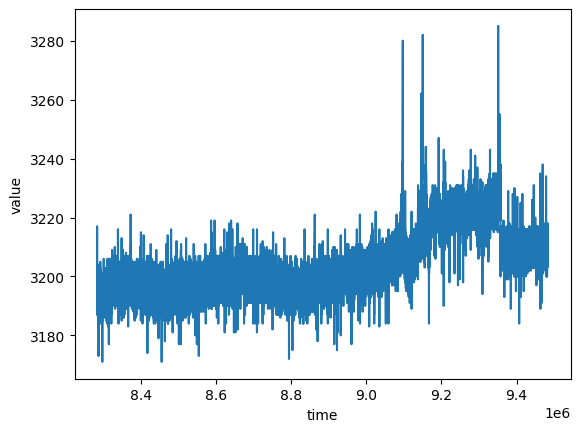

In [272]:
sns.lineplot(x="time", y="value", data=transistor_reverse_data)

We can see that the extreme spikes are very rare, and do not need them for the current analysis. We remove the outliers like before, but this time, we remove .993 from the upper side instead of .999, in order to eliminate more of the spikes.

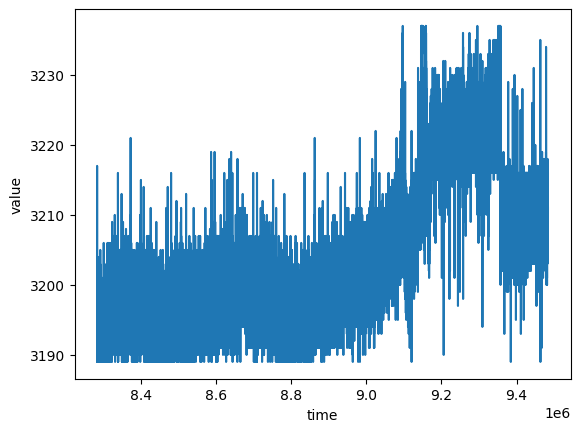

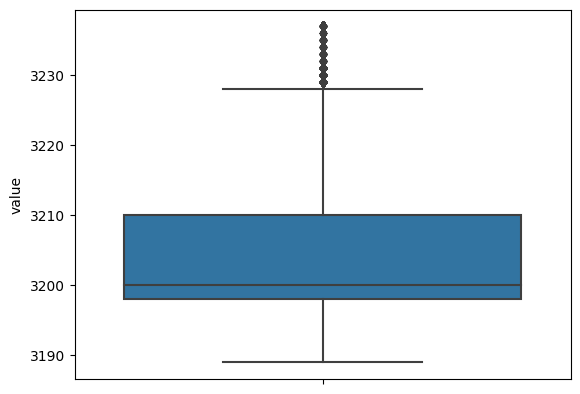

In [273]:
transistor_reverse_data = transistor_reverse_data.query("value < value.quantile(.993)")
transistor_reverse_data = transistor_reverse_data.query("value > value.quantile(.001)")
sns.lineplot(x="time", y="value", data=transistor_reverse_data)
plt.show()
sns.boxplot(y="value", data=transistor_reverse_data)
plt.show()

We have eliminated most of the outliers, and the data still appears to fairly represent the original.

### Value 2

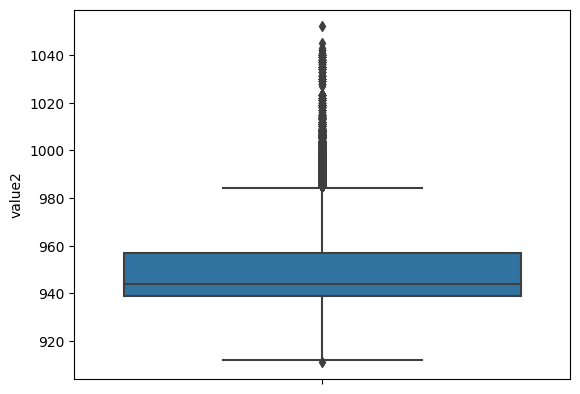

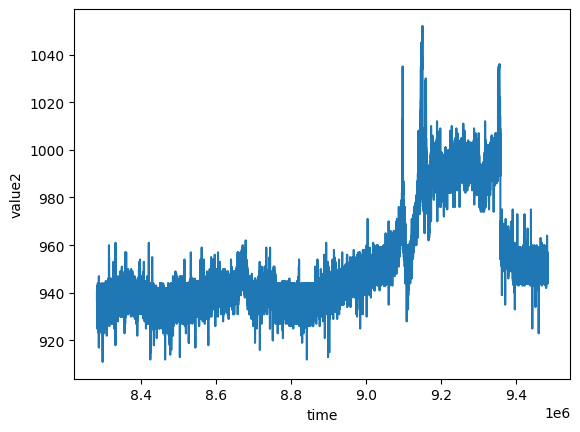

In [274]:
sns.boxplot(y="value2", data=transistor_reverse_data)
plt.show()
sns.lineplot(x="time", y="value2", data=transistor_reverse_data)
plt.show()

We also observe strange values for value 2. We will contemplate this later, but for now we will simply remove the spikes.

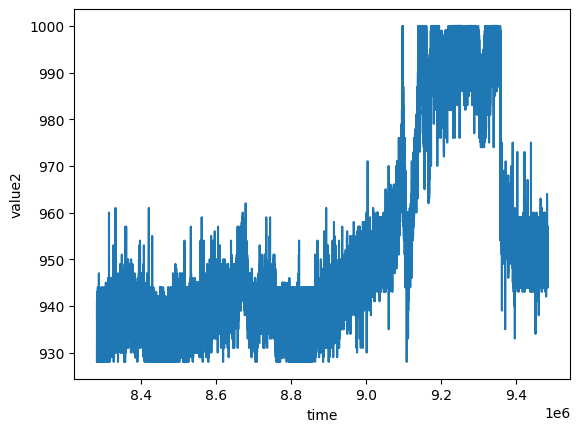

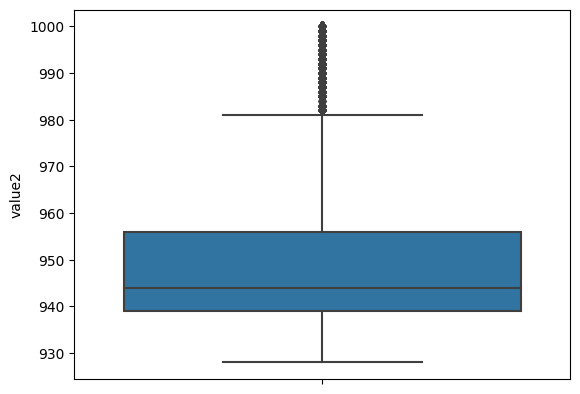

In [275]:
transistor_reverse_data = transistor_reverse_data.query("value2 < value2.quantile(.993)")
transistor_reverse_data = transistor_reverse_data.query("value2 > value2.quantile(.001)")
sns.lineplot(x="time", y="value2", data=transistor_reverse_data)
plt.show()
sns.boxplot(y="value2", data=transistor_reverse_data)
plt.show()

## Comparing the inputs

### Comparing the two values from the source dataset

Variance 1: 7.2256726810306215
Variance 2: 11.571617604820352
Range 1: 14
Range 2: 13


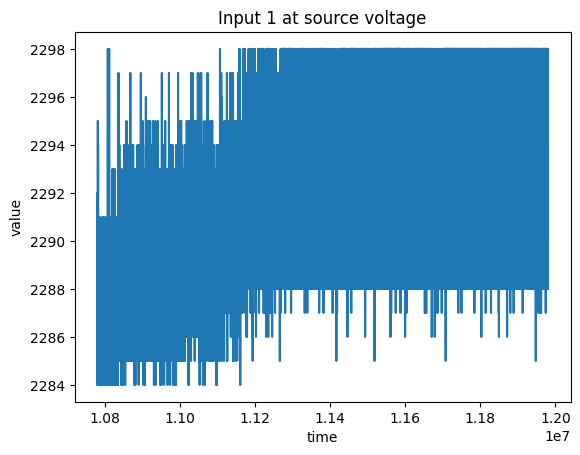

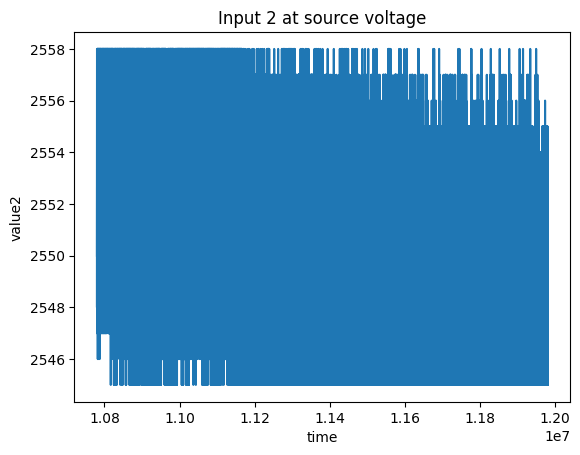

In [276]:
print("Variance 1:", base_source_data["value"].var())
print("Variance 2:", base_source_data["value2"].var())
print("Range 1:", base_source_data["value"].max() - base_source_data["value"].min())
print("Range 2:", base_source_data["value2"].max() - base_source_data["value2"].min())
plt.title("Input 1 at source voltage")
sns.lineplot(x="time", y="value", data=base_source_data)
plt.show()
plt.title("Input 2 at source voltage")
sns.lineplot(x="time", y="value2", data=base_source_data)
plt.show()

We observe strange behaviour in value 1. We will investigate this further by comparing the two other datasets. In transistor and transistor reversed, the measurement points for value 1 ant 2 have been swapped. While the filters attached to each input remain the same, the filters were attached to different points in the circuit. This way, we can view the input and filrter as a single package when comparing the two datasets.

### Comparing the transistor base voltage from the transistor and transistor reversed datasets

Variance: 17.56778805883789
Variance rev: 384.32051481365244
Range: 26
Range rev: 72


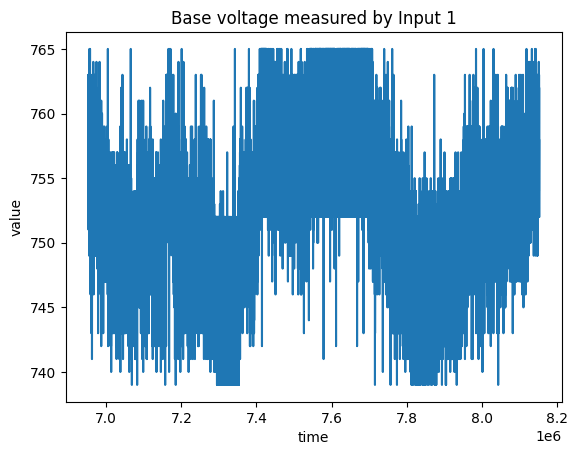

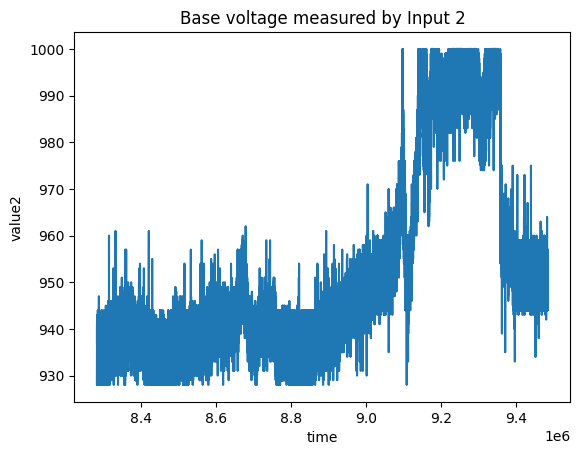

In [277]:
print("Variance:", transistor_data["value"].var())
print("Variance rev:", transistor_reverse_data["value2"].var())
print("Range:", transistor_data["value"].max() - transistor_data["value"].min())
print("Range rev:", transistor_reverse_data["value2"].max() - transistor_reverse_data["value2"].min())
plt.title("Base voltage measured by Input 1")
sns.lineplot(x="time", y="value", data=transistor_data)
plt.show()
plt.title("Base voltage measured by Input 2")
sns.lineplot(x="time", y="value2", data=transistor_reverse_data)
plt.show()

The base voltage seems to experience extreme fluctuations on both input-filter packages.

### Comparing the transistor collector voltage from the transistor and transistor reversed datasets

Variance: 24.310561921149116
Variance rev: 77.53117896197524
Range: 22
Range rev: 48


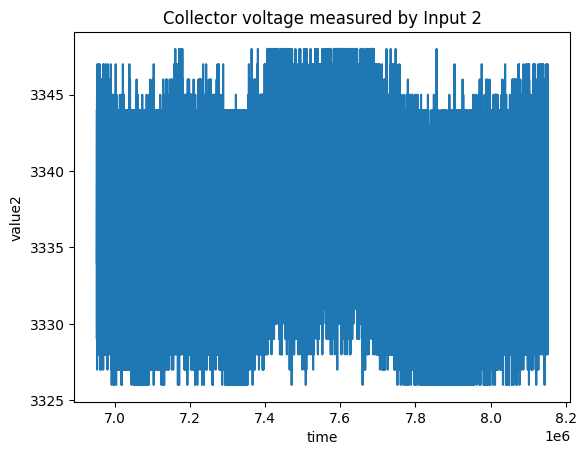

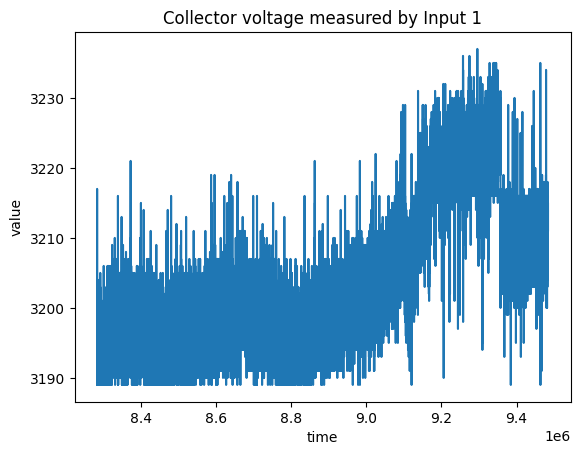

In [278]:
print("Variance:", transistor_data["value2"].var())
print("Variance rev:", transistor_reverse_data["value"].var())
print("Range:", transistor_data["value2"].max() - transistor_data["value2"].min())
print("Range rev:", transistor_reverse_data["value"].max() - transistor_reverse_data["value"].min())
plt.title("Collector voltage measured by Input 2")
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.show()
plt.title("Collector voltage measured by Input 1")
sns.lineplot(x="time", y="value", data=transistor_reverse_data)
plt.show()

### Conclusion
There is seemingly no corelation between the input-filter package and the large variations in the mid value.

We also observe that the variance is much higher for both input 1 and 2 in the reverse dataset. Since we can not find any corelation between an input-filter package and the large variations in the mid value, we can likely assume that the large variations are caused by external factors, besides the input-filter package. One possibility could be fluctuations in the power supply, which in this case is a desktop computer running other processes at varying load. It could also be caused by the air conditioner, that occationally sweeps past the experiment. We will not address these factors in this analysis.

## Choosing a dataset

Because the non-reversed dataset has fewer large variations, we will use this for our further analysis. We will also use the source dataset, to adress systematic errors from differences in the input-filter packages.

## Finding systematic errors using the source dataset

In [279]:
source_input_1_median = base_source_data["value"].median()
source_input_2_median = base_source_data["value2"].median()

source_input_1_std = base_source_data["value"].std()
source_input_2_std = base_source_data["value2"].std()

source_input_2_delta = source_input_2_median - source_input_1_median

print("Source input 1 median:", source_input_1_median)
print("Source input 2 median:", source_input_2_median)

print("Source input 2 delta:", source_input_2_delta)

print("Source input 1 std:", round(source_input_1_std, 2))
print("Source input 2 std:", round(source_input_2_std, 2))

Source input 1 median: 2291.0
Source input 2 median: 2550.0
Source input 2 delta: 259.0
Source input 1 std: 2.69
Source input 2 std: 3.4


We have found that input 1 and 2 have different medians. These are likely systematic errors caused by differences in the electrical components used for the input filters. We can confirm this systematic difference by comparing input 1 to input 2 in the transistor and transistor reverse datasets.

In [280]:
print("Source delta", source_input_2_delta)
print("Base delta", transistor_reverse_data["value2"].median() - transistor_data["value"].median())
print("Collector delta", transistor_data["value2"].median() - transistor_reverse_data["value"].median())

Source delta 259.0
Base delta 192.0
Collector delta 137.0


### Conclusion

We see a clear difference betweeninput 1 and input 2 in all three datasets. For this reason, we will classify this as a systematic error, and account for it in future calculations.

## Correcting the transistor dataset for the systematic error in Input 2

We will correct for the systematic error by subtracting the source_input_2_delta from input 2 in the transistor dataset. This will not fix anything in regards to calculating exact voltage, however it will go a long way in comparing the changes between the two inputs, and thus analyzing what effect the noise could have on a voltage calculated from a measurement directly on the collector, as oposed to being calculated from the base voltage through the transistor, which is subject to additional amplification, and thus increased uncertanty.

In [281]:
transistor_data["value2"] = transistor_data["value2"] - source_input_2_delta

## Analyzing the corrected transistor dataset

In [282]:
transistor_input_1_median = transistor_data["value"].median()
transistor_input_2_median = transistor_data["value2"].median()
transistor_input_1_std = transistor_data["value"].std()
transistor_input_2_std = transistor_data["value2"].std()

print("Transistor input 1 median:", transistor_input_1_median)
print("Transistor input 2 median:", transistor_input_2_median)

print("Transistor input 1 std:", round(transistor_input_1_std, 2))
print("Transistor input 2 std:", round(transistor_input_2_std, 2))

Transistor input 1 median: 752.0
Transistor input 2 median: 3078.0
Transistor input 1 std: 4.19
Transistor input 2 std: 4.93


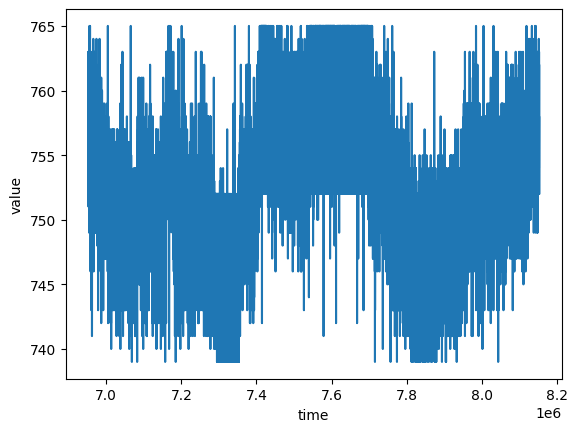

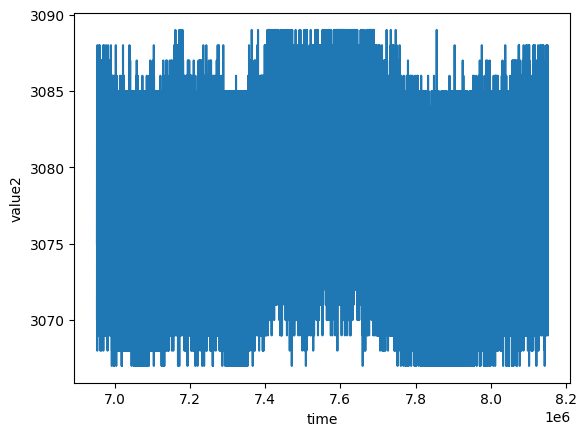

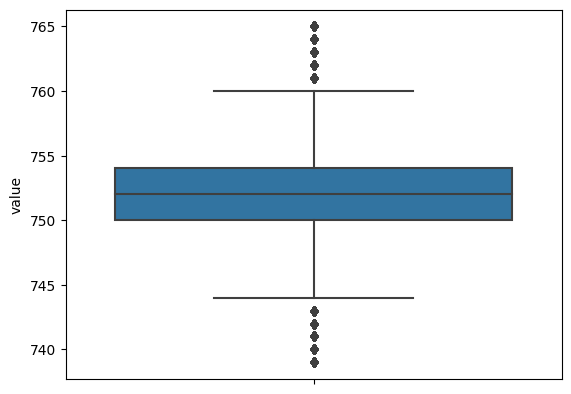

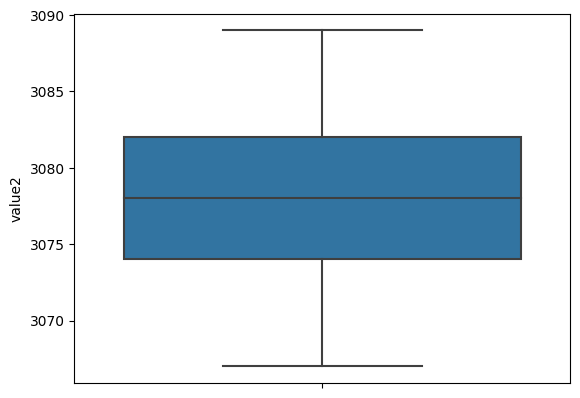

In [283]:
sns.lineplot(x="time", y="value", data=transistor_data)
plt.show()
sns.lineplot(x="time", y="value2", data=transistor_data)
plt.show()
sns.boxplot(y="value", data=transistor_data)
plt.show()
sns.boxplot(y="value2", data=transistor_data)
plt.show()

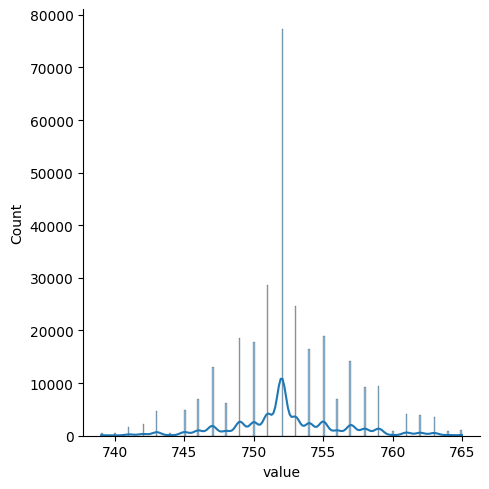

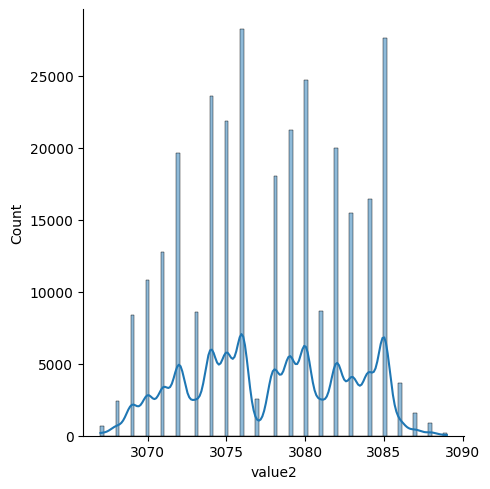

In [284]:
sns.displot(transistor_data, x="value", kde=True)
sns.displot(transistor_data, x="value2", kde=True)